In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import ticker
import os
import shutil
style.use("ggplot")

In [48]:
# Getting the Dataset using the Kaggle API
!kaggle datasets download -d shariful07/nice-work-thanks-for-share

# Unziping the Data
shutil.unpack_archive("nice-work-thanks-for-share.zip",extract_dir='data')

# Deleting the Zip File and the Cleaned Version
os.remove("nice-work-thanks-for-share.zip")



  0%|          | 0.00/850 [00:00<?, ?B/s]
100%|██████████| 850/850 [00:00<00:00, 885kB/s]


In [49]:
students = pd.read_csv(r"data/University Students Monthly Expenses.csv")

<BarContainer object of 2 artists>

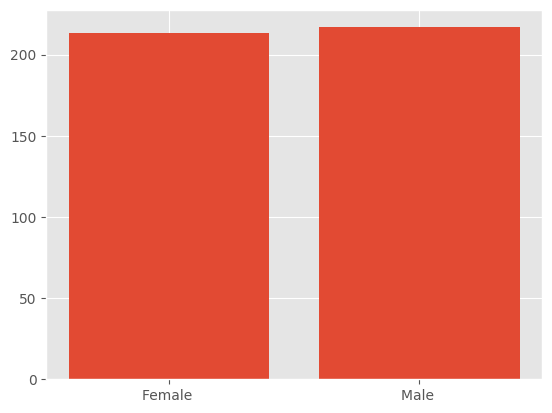

In [50]:
#plt.bar(students.Gender,)
# Quem gasta mais?
compacted = pd.DataFrame(students.groupby("Gender")['Monthly_expenses_$'].mean())
plt.bar(compacted.index,compacted['Monthly_expenses_$'])

Text(0.0, 1.0, 'Most Expensive Age')

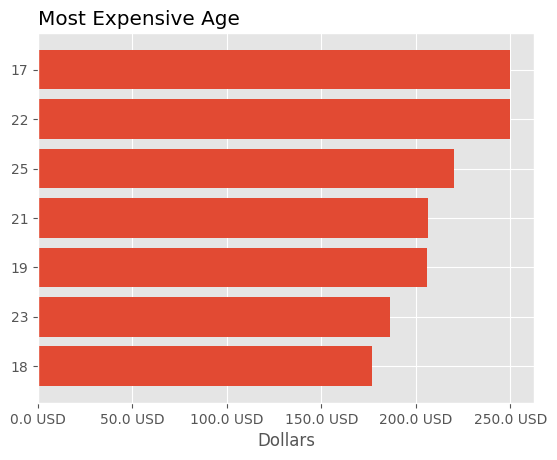

In [51]:
compacted = students.groupby("Age")['Monthly_expenses_$'].mean().sort_values(ascending=False)

fig, ax = plt.subplots()

ages = compacted.index
y = np.arange(len(ages))
data = compacted

ax.barh(y, data, align='center')
ax.set_yticks(y, labels=ages)
ax.invert_yaxis()
ax.set_xlabel('Dollars')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x} USD"))
ax.set_title('Most Expensive Age',loc='left')


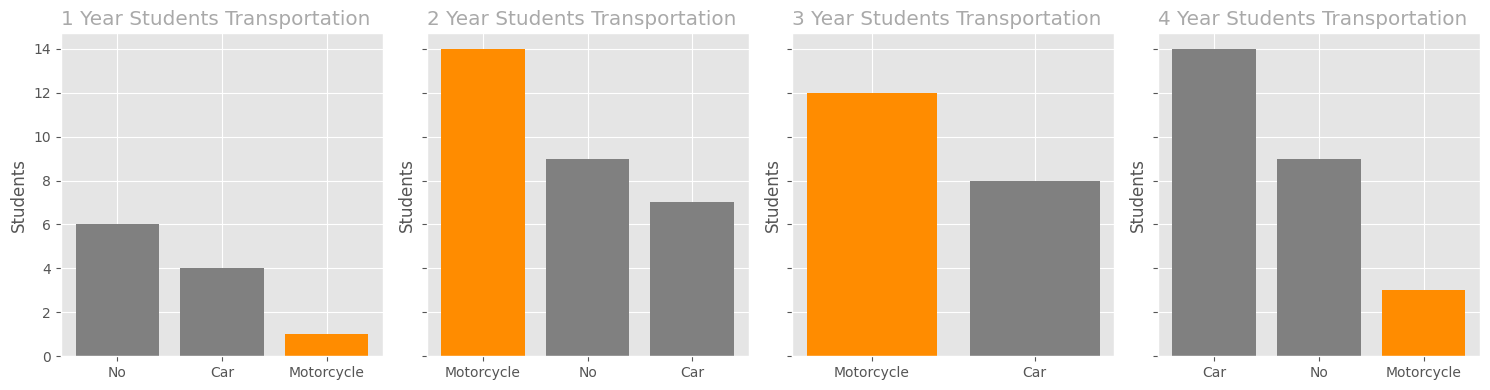

In [149]:
# Students Transport methods based on the Study Year



filtered_data = pd.DataFrame(students.groupby("Study_year")['Transporting'].value_counts().reset_index().set_index("Study_year",drop=True))

fig,ax = plt.subplots(1,4,figsize=(15,4),sharey=True)

for i in range(0,4):
    year = i+1
    labels = filtered_data.loc[filtered_data.index==year].Transporting
    data = filtered_data.loc[filtered_data.index==year]['count']
    colors = list(map(lambda x: "darkorange" if x == "Motorcycle" else "gray",labels.unique()))
    ax[i].bar(labels,data,color=colors)
    ax[i].set_title(f"{year} Year Students Transportation",loc='left',c='darkgray')
    ax[i].set_ylabel("Students")

plt.tight_layout()


Text(0, 0.5, 'Money')

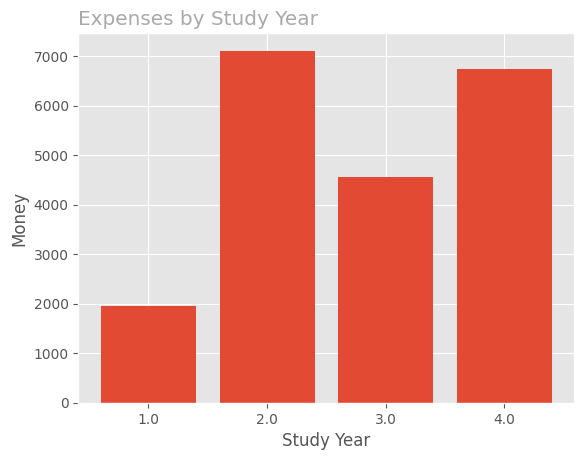

In [165]:
data = pd.DataFrame(students.groupby("Study_year")['Monthly_expenses_$'].sum())

plt.bar(data.index.astype(str),data['Monthly_expenses_$'])

plt.title("Expenses by Study Year",loc='left',color='darkgray')
plt.xlabel("Study Year")
plt.ylabel("Money")